In [1]:
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import clicfast2023.clicfast2023 as clicfast2023
import clicfast2023.analysis.interpreter as interpreter
import clicfast2023.analysis.event_builder as event_builder
import clicfast2023.analysis.fitfunctions as fitfunctions
import clicfast2023.analysis.data_loader as data_loader
datdir = '/home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw'

## get flist

In [2]:
def get_flist(datdir, pattern='injection_scan.h5'):
    flist =[]
    for fname in np.sort(os.listdir(datdir)):
        if fname[-len(pattern):] == pattern:
            flist.append(fname)
    #for i, fname in enumerate(flist):
    #    print(i, fname)
    return flist

def get_ts(dat):
    res_dtype = [('event_number', 'i'), ('col', 'i'), ('comp', 'i'), 
                ('toa', 'f'), ('tot', 'f'), ('tdc', 'f'), 
                ('toa_std', 'f'), ('tot_std', 'f'), ('tdc_std', 'f'),
                ('inj', 'f')]

    dat = dat[np.argsort(dat[['col', 'comp', 'event_number']])]
    uni, idx = np.unique(dat[['col', 'comp', 'event_number']], 
                            return_index=True)
    dat_split = np.split(dat, idx[1:])
    res_ts = np.empty(len(uni), dtype=res_dtype)
    res_ts['col'] = uni['col']
    res_ts['comp'] = uni['comp']
    res_ts['event_number'] = uni['event_number']

    for d_i, d in enumerate(dat_split):
        res_ts[d_i]['toa'] = np.average(d['toa'])
        res_ts[d_i]['toa_std'] = np.std(d['toa'])
        res_ts[d_i]['tot'] = np.average(d['tot'])
        res_ts[d_i]['tot_std'] = np.std(d['tot'])
        res_ts[d_i]['tdc'] = np.average(d['tdc'])
        res_ts[d_i]['tdc_std'] = np.std(d['tdc'])
    
    return res_ts

2024-06-21 16:49:37,965 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/th_tuning/trigger/20240621_120030_injection_hit.h5


2024-06-21 16:49:37,972 - root - [INFO    ] (MainThread) 0.00s hit=76800/76800 event=76800 ts=12800/12800
2024-06-21 16:49:37,973 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/th_tuning/trigger/20240621_120030_injection_hit.h5


0.01s 460804/460804 hit=76800 ts=12800 trig=12800
{'plsgen_phase': 'external', 'PixelConf.en_comp': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 

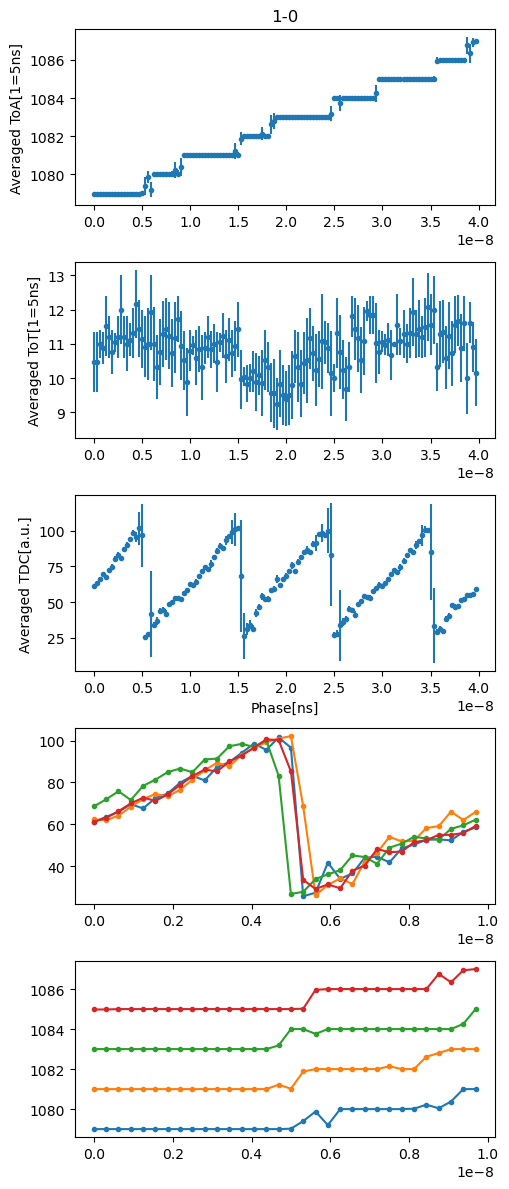

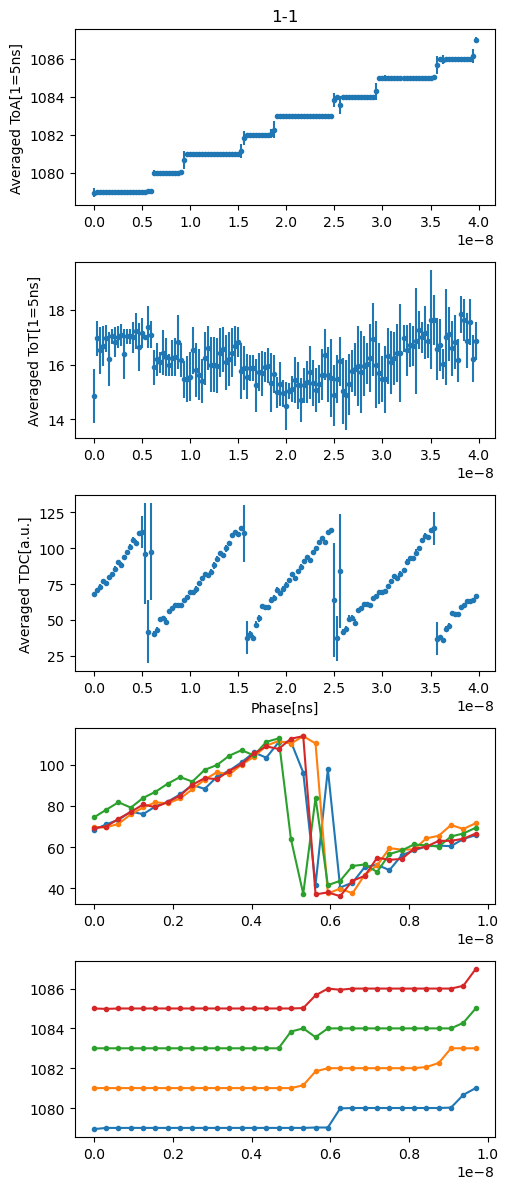

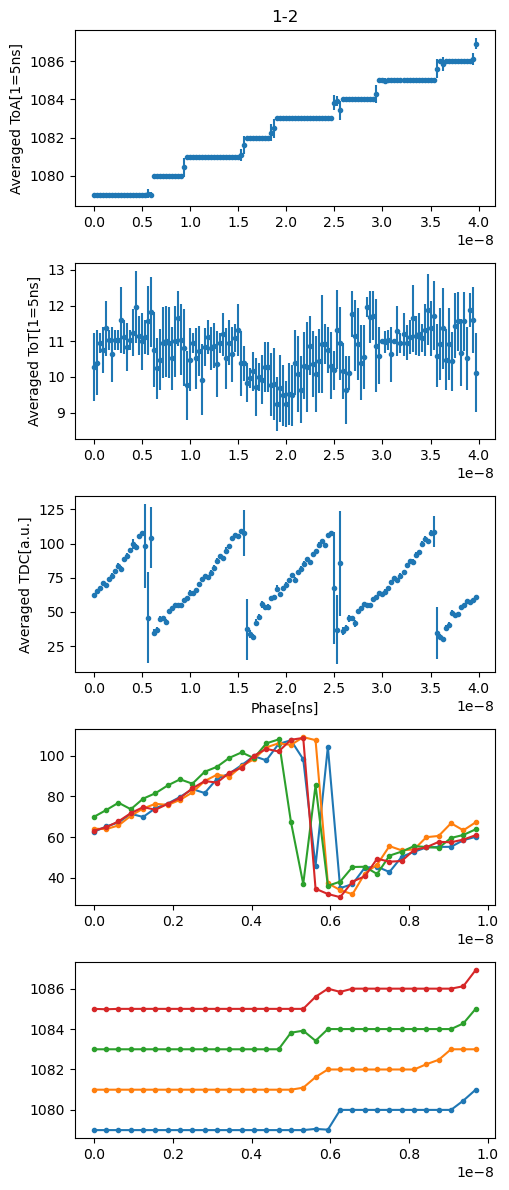

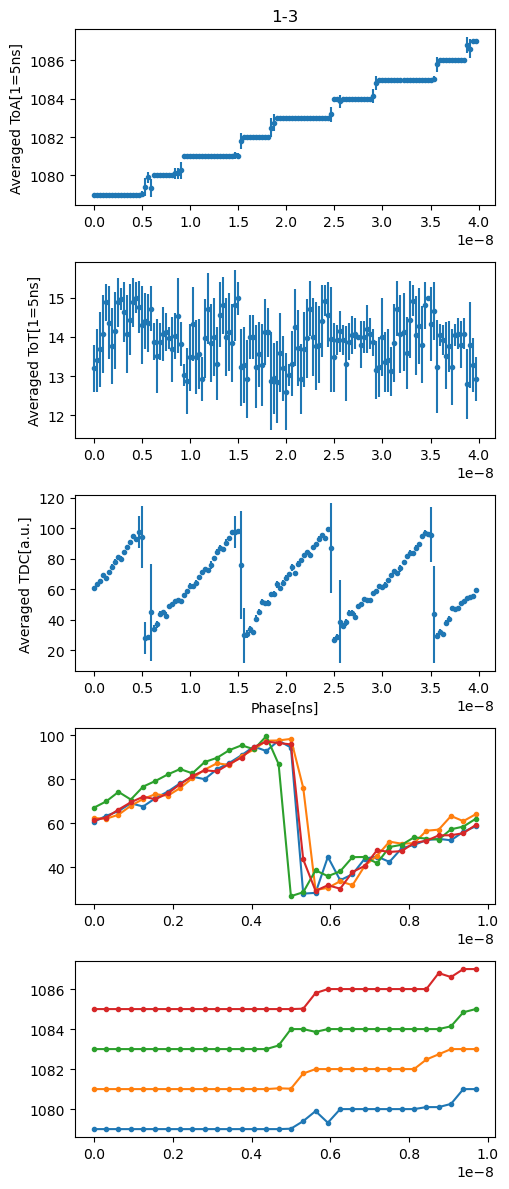

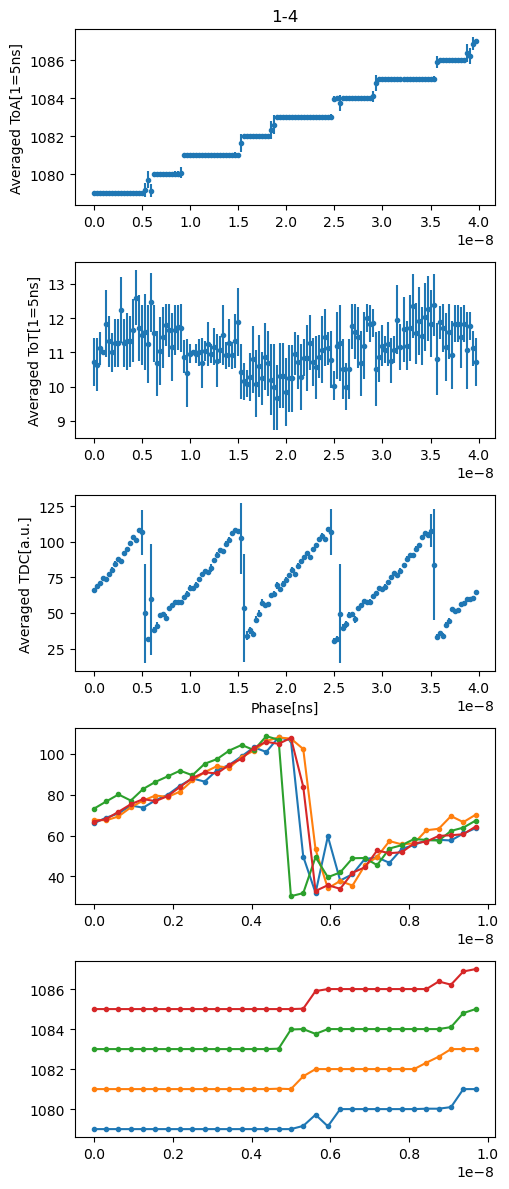

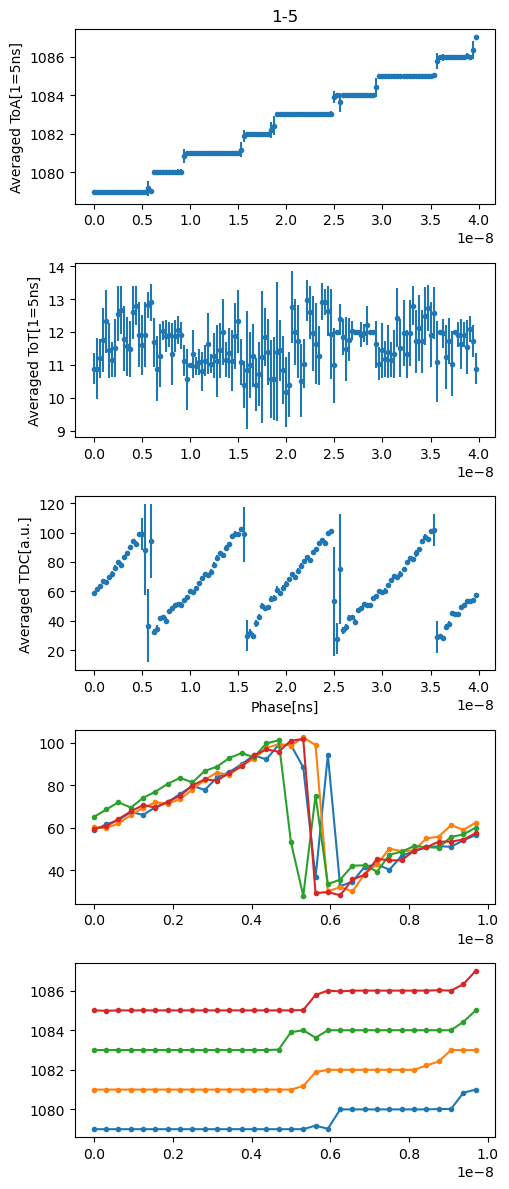

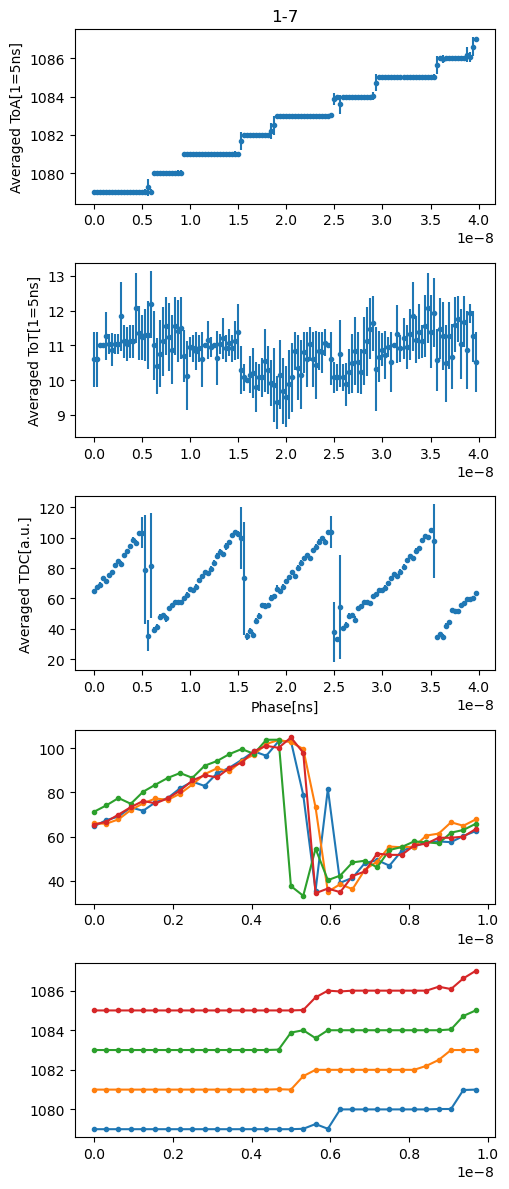

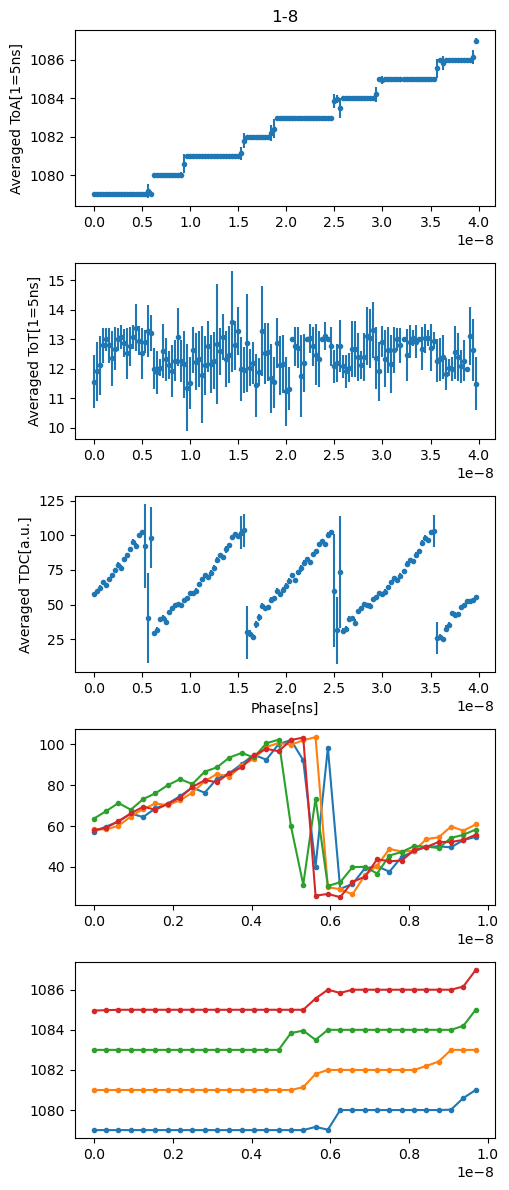

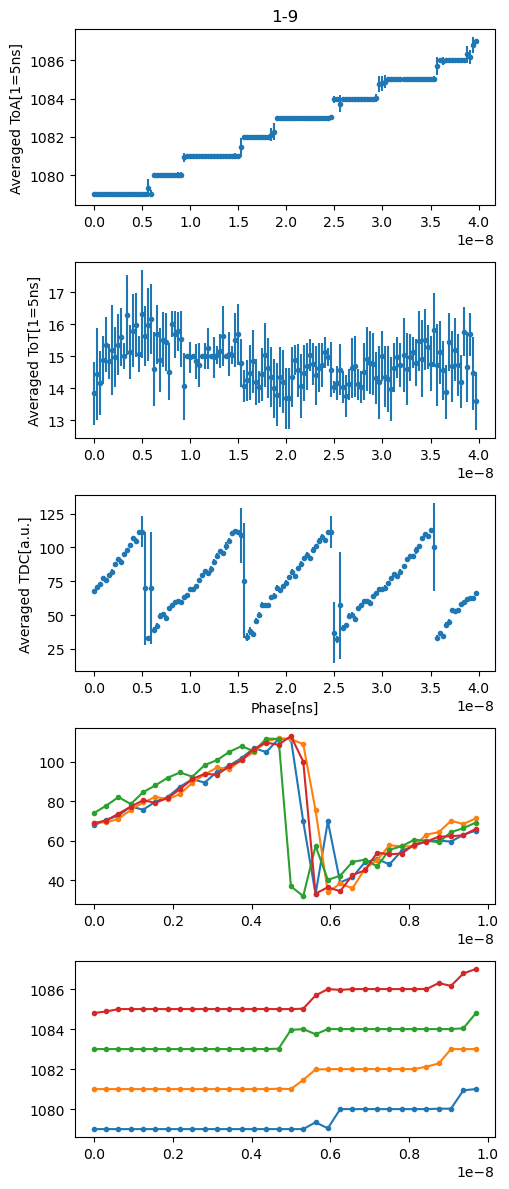

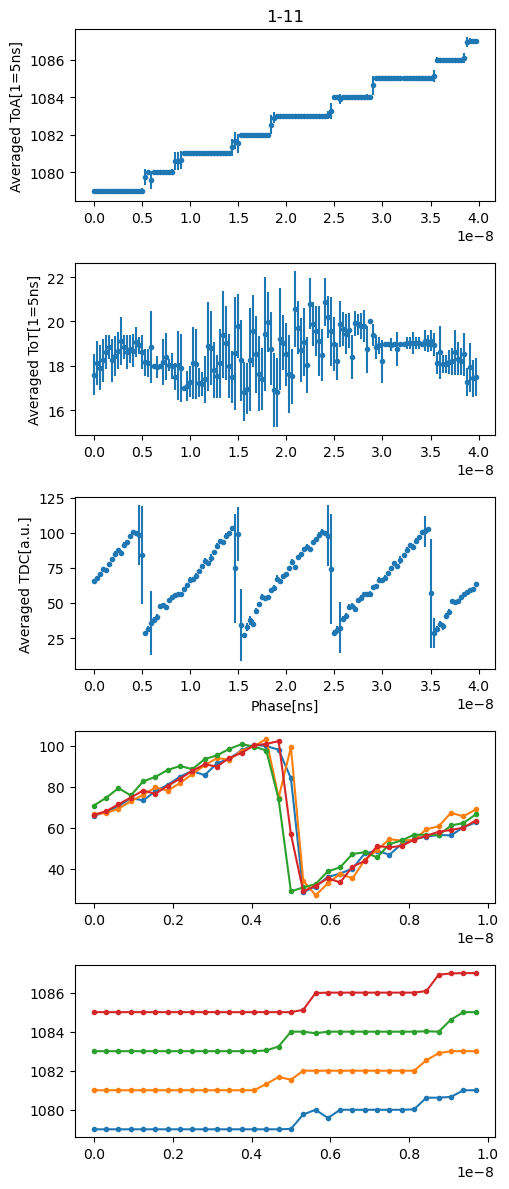

In [6]:
datdir = '/home/thirono/cernbox/clicfast2022/th_tuning/trigger'
importlib.reload(data_loader)

fname = get_flist(datdir, pattern='injection_scan.h5')[1]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)
data_loader.analyze(fraw, fhit)
dat = data_loader.load_all_data(fhit)
param, extra_param = data_loader.load_scan_param(
    fraw, 
    conf_name=['PixelConf.en_comp', 'inj.REPEAT'], 
    karg_name=['plsgen_phase'])
print(extra_param)
ret = data_loader.get_ts(dat, param, extra_param, plotting=True, outdir="_".join(fraw.split('_')[:-1]))

In [9]:
imgdir='_'.join(fraw.split('_')[:-1])
if not os.path.exists(imgdir):
    os.mkdir(imgdir)
uni, idx, cnt = np.unique(ret[['col', 'comp']], return_index=True, return_counts=True)
for u_i, u in enumerate(uni):
    
    tmp = ret[idx[u_i]:idx[u_i]+cnt[u_i]]
    phase = param[tmp['event_number']]['phase']
    #x = (phase % 10.0E-9)
    #y =  tmp['tdc']
    #y_th = np.max(y)*0.66
    #x[(x < 5.0E-9) & (y>y_th)] = x[(x < 5.0E-9) & (y>y_th)] +10.0E-9
    #a, b, a_err, b_err = fitfunctions.fit_line(x,y)

    fig, ax = plt.subplots(nrows=5, sharex=False,figsize=[5, 12])
    #fig = plt.figure()
    #gs = fig.add_gridspec(3, 1)
    #ax = []
    #ax.append(fig.add_subplot(gs[0, 0]))
    #ax.append(fig.add_subplot(gs[1, 0]))
    #ax.append(fig.add_subplot(gs[2, 0]))
    #ax.append(fig.add_subplot(gs[:, 1]))
    ax[0].errorbar(phase, tmp['toa'], yerr=tmp['toa_std'], fmt='C0.')
    ax[1].errorbar(phase, tmp['tot'], yerr=tmp['tot_std'], fmt='C0.')
    ax[2].errorbar(phase, tmp['tdc'], yerr=tmp['tdc_std'], fmt='C0.')
    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[3].errorbar(phase[arg]-32*4*i, tmp['tdc'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')

    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[4].errorbar(phase[arg]-32*4*i, tmp['toa'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')

    ax[-1].set_xlabel('Phase[ns]')
    ax[0].set_ylabel('Averaged ToA[1=5ns]')
    ax[1].set_ylabel('Averaged ToT[1=5ns]')
    ax[2].set_ylabel('Averaged TDC[a.u.]')
    #ax[2].set_xlim(0,100)
    title = '{}-{}'.format(u['col'],u['comp'])
    ax[0].set_title(title)
    fig.tight_layout()
    fig.savefig(os.path.join(imgdir, title+'.png'))
    plt.close()

## load data

In [25]:
importlib.reload(data_loader)
importlib.reload(fitfunctions)

fname = get_flist(datdir, pattern='injection_scan.h5')[0]
fraw, fhit = data_loader.get_filename(fname, datdir=datdir)
#data_loader.analyze(fraw, fhit)
dat = data_loader.load_all_data(fhit)
param, extra_param = data_loader.load_scan_param(fraw, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret = get_ts(dat)
#ret, scurves = data_loader.get_scurves(dat, param, fitting=True, inj_n=extra_param['inj.REPEAT'], 
#                                       outdir=fraw[:-8], return_data=True, plotting=True)

fname = get_flist(datdir, pattern='injection_scan.h5')[1]
fraw1, fhit = data_loader.get_filename(fname, datdir=datdir)
#data_loader.analyze(fraw, fhit)
dat1= data_loader.load_all_data(fhit)
param1, extra_param = data_loader.load_scan_param(fraw1, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret1 = get_ts(dat1)
#ret1, scurves1 = data_loader.get_scurves(dat, param, fitting=True, inj_n=extra_param['inj.REPEAT'], 
#                                       outdir=fraw[:-8], return_data=True, plotting=True)

fname = get_flist(datdir, pattern='injection_scan.h5')[2]
print(fname)
fraw2, fhit = data_loader.get_filename(fname, datdir=datdir)
#data_loader.analyze(fraw2, fhit)
dat2 = data_loader.load_all_data(fhit)
param2, extra_param = data_loader.load_scan_param(fraw2, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret2 = get_ts(dat2)

fname = get_flist(datdir, pattern='injection_scan.h5')[3]
print(fname)
fraw3, fhit = data_loader.get_filename(fname, datdir=datdir)
data_loader.analyze(fraw3, fhit)
dat3 = data_loader.load_all_data(fhit)
param3, extra_param = data_loader.load_scan_param(fraw3, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret3 = get_ts(dat3)

## delay in the pulse generator
fname = get_flist(datdir, pattern='injection_scan.h5')[4]
fraw4, fhit = data_loader.get_filename(fname, datdir=datdir)
data_loader.analyze(fraw4, fhit)
dat4 = data_loader.load_all_data(fhit)
param4, extra_param = data_loader.load_scan_param(fraw4, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret4 = get_ts(dat4)

## with FPGA delay 
fname = get_flist(datdir, pattern='injection_scan.h5')[5]
fraw5, fhit = data_loader.get_filename(fname, datdir=datdir)
data_loader.analyze(fraw5, fhit)
dat5 = data_loader.load_all_data(fhit)
param5, extra_param = data_loader.load_scan_param(fraw5, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret5 = get_ts(dat5)

## with FPGA delay 
fname = get_flist(datdir, pattern='injection_scan.h5')[6]
fraw6, fhit = data_loader.get_filename(fname, datdir=datdir)
data_loader.analyze(fraw6, fhit)
dat6 = data_loader.load_all_data(fhit)
param6, extra_param = data_loader.load_scan_param(fraw6, conf_name=['PixelConf.en_comp', 'inj.REPEAT'])
ret6 = get_ts(dat6)

20240612_173623_injection_scan.h5
20240613_143144_injection_scan.h5
imcomplete hit 12 (0, 14, 5, 43, 42, 0, 87, 25746, 76)
0.11s 10000000/17640072 hit=1904753 ts=158730 trig=0


2024-06-20 17:15:45,367 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240613_143144_injection_hit.h5
2024-06-20 17:15:45,498 - root - [INFO    ] (MainThread) 0.13s hit=3360000/3360000 event=3360000 ts=280000/280000
2024-06-20 17:15:45,500 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240613_143144_injection_hit.h5


0.19s 17640072/17640072 hit=3360000 ts=280000 trig=0


2024-06-20 17:15:48,884 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240613_150013_injection_hit.h5


imcomplete hit 9 (0, 14, 5, 0, 0, 0, 97, 25696, 57)
0.11s 10000000/17640119 hit=1904754 ts=158730 trig=0
0.19s 17640119/17640119 hit=3360007 ts=280000 trig=0


2024-06-20 17:15:49,016 - root - [INFO    ] (MainThread) 0.13s hit=3360007/3360007 event=3360007 ts=280000/280000
2024-06-20 17:15:49,017 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240613_150013_injection_hit.h5


imcomplete hit 9 (0, 10, 1, 0, 0, 0, 52, 43455, 57)
0.10s 10000000/25805256 hit=1666650 ts=277773 trig=277773
imcomplete hit 6 (9999996, 10, 0, 31, 31, 41, 52, 42239, 38)
0.20s 20000000/25805256 hit=3333299 ts=555547 trig=555547
0.26s 25805256/25805256 hit=4300836 ts=716800 trig=716800


2024-06-20 17:15:52,525 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240620_145226_injection_hit.h5
2024-06-20 17:15:52,693 - root - [INFO    ] (MainThread) 0.16s hit=4300836/4300836 event=4300836 ts=716800/716800
2024-06-20 17:15:52,694 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240620_145226_injection_hit.h5
2024-06-20 17:15:58,384 - root - [INFO    ] (MainThread) interpreted /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240620_165202_injection_hit.h5


imcomplete hit 12 (0, 10, 8, 33, 32, 0, 68, 44584, 76)
0.10s 10000000/24486107 hit=1646327 ts=294709 trig=294709
imcomplete hit 6 (0, 0, 0, 0, 0, 0, 0, 24862, 38)
0.20s 20000000/24486107 hit=3312202 ts=573131 trig=573131
0.25s 24486107/24486107 hit=4037010 ts=716800 trig=716800


2024-06-20 17:15:58,541 - root - [INFO    ] (MainThread) 0.15s hit=4037010/4037010 event=4037010 ts=716800/716800
2024-06-20 17:15:58,542 - root - [INFO    ] (MainThread) alingned to timestamp /home/thirono/cernbox/clicfast2022/th_tuning/collarge_tw/20240620_165202_injection_hit.h5


In [21]:
imgdir='_'.join(fraw5.split('_')[:-1])
if not os.path.exists(imgdir):
    os.mkdir(imgdir)
uni, idx, cnt = np.unique(ret5[['col', 'comp']], return_index=True, return_counts=True)
for u_i, u in enumerate(uni):
    
    tmp = ret5[idx[u_i]:idx[u_i]+cnt[u_i]]
    phase = param5[tmp['event_number']]['phase']
    #x = (phase % 10.0E-9)
    #y =  tmp['tdc']
    #y_th = np.max(y)*0.66
    #x[(x < 5.0E-9) & (y>y_th)] = x[(x < 5.0E-9) & (y>y_th)] +10.0E-9
    #a, b, a_err, b_err = fitfunctions.fit_line(x,y)

    fig, ax = plt.subplots(nrows=4, sharex=False,figsize=[5, 8])
    #fig = plt.figure()
    #gs = fig.add_gridspec(3, 1)
    #ax = []
    #ax.append(fig.add_subplot(gs[0, 0]))
    #ax.append(fig.add_subplot(gs[1, 0]))
    #ax.append(fig.add_subplot(gs[2, 0]))
    #ax.append(fig.add_subplot(gs[:, 1]))
    ax[0].errorbar(phase, tmp['toa'], yerr=tmp['toa_std'], fmt='C0.')
    ax[1].errorbar(phase, tmp['tot'], yerr=tmp['tot_std'], fmt='C0.')
    ax[2].errorbar(phase, tmp['tdc'], yerr=tmp['tdc_std'], fmt='C0.')
    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[3].errorbar(phase[arg]-32*4*i, tmp['tdc'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')
    
    ax[-1].set_xlabel('Phase[ns]')
    ax[0].set_ylabel('Averaged ToA[1=5ns]')
    ax[1].set_ylabel('Averaged ToT[1=5ns]')
    ax[2].set_ylabel('Averaged TDC[a.u.]')
    #ax[2].set_xlim(0,100)
    title = '{}-{}'.format(u['col'],u['comp'])
    ax[0].set_title(title)
    fig.tight_layout()
    fig.savefig(os.path.join(imgdir, title+'.png'))
    plt.close()
    #break

In [26]:
imgdir='_'.join(fraw5.split('_')[:-1])
if not os.path.exists(imgdir):
    os.mkdir(imgdir)
uni, idx, cnt = np.unique(ret5[['col', 'comp']], return_index=True, return_counts=True)
for u_i, u in enumerate(uni):
    
    tmp = ret5[idx[u_i]:idx[u_i]+cnt[u_i]]
    phase = param5[tmp['event_number']]['phase']
    #x = (phase % 10.0E-9)
    #y =  tmp['tdc']
    #y_th = np.max(y)*0.66
    #x[(x < 5.0E-9) & (y>y_th)] = x[(x < 5.0E-9) & (y>y_th)] +10.0E-9
    #a, b, a_err, b_err = fitfunctions.fit_line(x,y)

    fig, ax = plt.subplots(nrows=5, sharex=False,figsize=[5, 12])
    #fig = plt.figure()
    #gs = fig.add_gridspec(3, 1)
    #ax = []
    #ax.append(fig.add_subplot(gs[0, 0]))
    #ax.append(fig.add_subplot(gs[1, 0]))
    #ax.append(fig.add_subplot(gs[2, 0]))
    #ax.append(fig.add_subplot(gs[:, 1]))
    ax[0].errorbar(phase, tmp['toa'], yerr=tmp['toa_std'], fmt='C0.')
    ax[1].errorbar(phase, tmp['tot'], yerr=tmp['tot_std'], fmt='C0.')
    ax[2].errorbar(phase, tmp['tdc'], yerr=tmp['tdc_std'], fmt='C0.')
    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[3].errorbar(phase[arg]-32*4*i, tmp['tdc'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')

    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[4].errorbar(phase[arg]-32*4*i, tmp['toa'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')

    ax[-1].set_xlabel('Phase[ns]')
    ax[0].set_ylabel('Averaged ToA[1=5ns]')
    ax[1].set_ylabel('Averaged ToT[1=5ns]')
    ax[2].set_ylabel('Averaged TDC[a.u.]')
    #ax[2].set_xlim(0,100)
    title = '{}-{}'.format(u['col'],u['comp'])
    ax[0].set_title(title)
    fig.tight_layout()
    fig.savefig(os.path.join(imgdir, title+'.png'))
    plt.close()

In [28]:
imgdir='_'.join(fraw6.split('_')[:-1])
if not os.path.exists(imgdir):
    os.mkdir(imgdir)
uni, idx, cnt = np.unique(ret6[['col', 'comp']], return_index=True, return_counts=True)
for u_i, u in enumerate(uni):
    
    tmp = ret6[idx[u_i]:idx[u_i]+cnt[u_i]]
    phase = param6[tmp['event_number']]['phase']
    #x = (phase % 10.0E-9)
    #y =  tmp['tdc']
    #y_th = np.max(y)*0.66
    #x[(x < 5.0E-9) & (y>y_th)] = x[(x < 5.0E-9) & (y>y_th)] +10.0E-9
    #a, b, a_err, b_err = fitfunctions.fit_line(x,y)

    fig, ax = plt.subplots(nrows=5, sharex=False,figsize=[5, 12])
    #fig = plt.figure()
    #gs = fig.add_gridspec(3, 1)
    #ax = []
    #ax.append(fig.add_subplot(gs[0, 0]))
    #ax.append(fig.add_subplot(gs[1, 0]))
    #ax.append(fig.add_subplot(gs[2, 0]))
    #ax.append(fig.add_subplot(gs[:, 1]))
    ax[0].errorbar(phase, tmp['toa'], yerr=tmp['toa_std'], fmt='C0.')
    ax[1].errorbar(phase, tmp['tot'], yerr=tmp['tot_std'], fmt='C0.')
    ax[2].errorbar(phase, tmp['tdc'], yerr=tmp['tdc_std'], fmt='C0.')
    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[3].errorbar(phase[arg]-32*4*i, tmp['tdc'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')

    for i in range(4):
        arg = np.argwhere((phase>=32*4*i) & (phase<32*4*(i+1)))
        #print(i, len(arg), arg)
        ax[4].errorbar(phase[arg]-32*4*i, tmp['toa'][arg], fmt='.-') #yerr=tmp['tdc_std'][arg], fmt='.-')

    ax[-1].set_xlabel('Phase[ns]')
    ax[0].set_ylabel('Averaged ToA[1=5ns]')
    ax[1].set_ylabel('Averaged ToT[1=5ns]')
    ax[2].set_ylabel('Averaged TDC[a.u.]')
    #ax[2].set_xlim(0,100)
    title = '{}-{}'.format(u['col'],u['comp'])
    ax[0].set_title(title)
    fig.tight_layout()
    fig.savefig(os.path.join(imgdir, title+'.png'))
    plt.close()

In [448]:
imgdir='_'.join(fraw.split('_')[:-1])

if not os.path.exists(imgdir):
    os.mkdir(imgdir)
importlib.reload(fitfunctions)
uni = np.unique(ret4[['col', 'comp']])
tdc_calib=np.empty(len(uni), [('col','u1'), ('comp','u1'), ('a', 'f'), ('b', 'f'),])
for u_i, u in enumerate(uni):
    tmp = dat4[dat4[['col','comp']]==u]
    x = param4[tmp['event_number']]['phase']
    x = (x % 10.0E-9)
    y =  tmp['tdc']
    arg_max = np.argmax(y)
    arg_min = np.argmin(y)
    y_th = np.max(y)*0.66 + np.min(y)*(1-0.66)
    y_th2 = np.max(y)*0.2 + np.min(y)*0.8
    plt.plot(x*1E9, y, 'C0.')
    x[(x < 3.0E-9) & (y>y_th)] = x[(x < 3.0E-9) & (y>y_th)] +10.0E-9
    x[(x > 7.0E-9) & (y<y_th2)] = x[(x > 7.0E-9) & (y<y_th2)] - 10.0E-9
    

    plt.plot(x*1E9, y, 'C1.')
    a, b, a_err, b_err = fitfunctions.fit_line(x*1E9, y)

    tdc_calib[u_i]['a'] = a
    tdc_calib[u_i]['b'] = b
    tdc_calib[u_i]['col'] = u['col']
    tdc_calib[u_i]['comp'] = u['comp']

    plt.plot(x*1E9, fitfunctions.line(x*1E9, a, b),'C1-', label='{0:.3f}x+{1:.3f}'.format(a,b))
    title = '{}'.format(u)
    plt.title(title)
    plt.legend()
    print (u_i, u, a, b, y_th, y_th2)
    plt.savefig(os.path.join(imgdir, title+'_tdc_calib.png'))
    plt.close()
np.savetxt(os.path.join(imgdir, ''), tdc_calib.csv)

0 (1, 0) 7.912246780448818 14.15293046864999 77.42 37.400000000000006
1 (1, 1) 7.965707650668463 22.364728095667466 88.1 49.0
2 (1, 2) 8.040840643316395 16.191713186670253 84.08000000000001 43.6
3 (1, 3) 7.456149168033569 17.166018692014372 76.14 39.800000000000004
4 (1, 4) 8.010193465774357 19.818887582307 84.1 45.0
5 (1, 5) 7.561899120337763 15.317273025165706 77.46 40.2
6 (1, 6) 7.930919426999926 8.675317006692914 75.42 35.4
7 (1, 7) 7.24394041345764 23.067950805330234 82.14 45.8
8 (1, 8) 7.923251151562665 11.457621590901475 78.10000000000001 39.0
9 (1, 9) 8.267718834637686 20.35242308146713 86.74 45.800000000000004
10 (1, 10) 8.752234383047714 22.02938332087875 76.78 38.6
11 (1, 11) 7.985875908865858 18.499526970808862 78.78 40.60000000000001
12 (2, 0) 6.424361644964383 20.296483878507214 83.42 43.400000000000006
13 (2, 1) 7.486543705858994 14.916426122741349 80.78 42.6
14 (2, 2) 7.698098410243651 10.158893438852914 79.42 39.400000000000006
15 (2, 3) 8.557716938176313 17.8787183736

/home/thirono/Nextcloud-kit/workspace/clicfast2023/kit-gitlab/clicfast2023/analysis/fitfunctions.py:57: RuntimeWarning: overflow encountered in scalar subtract
  p, cov = curve_fit(line, xarray, yarray)


51 (9, 3) 8.771399904037864 44.325347476100625 86.10000000000001 47.0
52 (9, 4) 9.218248120441729 30.534288514696723 81.42 41.400000000000006
53 (9, 5) 6.252212533973562 53.5518023592709 86.76 47.2
54 (9, 6) 8.273879602288346 18.056492020645 77.46 40.2
55 (9, 7) 7.892523313894065 22.753765969901387 81.46 44.2
56 (9, 8) 9.781490545282542 26.781200290544316 95.34 49.8
57 (9, 9) 9.922806174424911 28.18504620037933 94.7 51.0
58 (9, 10) 9.216990721032825 21.320628381786552 86.06 44.2
59 (9, 11) 9.109078130646546 26.999953788231547 83.42 43.400000000000006
60 (10, 0) 8.047722195717647 17.07291372605162 83.42 43.400000000000006
61 (10, 1) 8.13702359763792 15.882336807576324 82.10000000000001 43.0
62 (10, 2) 8.584780152043475 16.26295659886821 88.06 46.2
63 (10, 3) 7.885441217605586 11.879003970099976 78.10000000000001 39.0
64 (10, 4) 8.386993535305574 14.38882225429454 84.74000000000001 43.8
65 (10, 5) 9.002168259569505 15.32852436959963 88.04 44.8
66 (10, 6) 8.3836350073089 20.00713036144586

AttributeError: 'numpy.ndarray' object has no attribute 'csv'

In [362]:
tmp = dat3[(dat3['col']==1) & (dat3['comp']==0)]
x = param3[tmp['event_number']]['phase']
x = (x % 10.0E-9) *1E9
y =  tmp['tdc']
y_th = np.max(y)*0.66
#plt.plot(x, y, '.')
x[(x < 5) & (y>y_th)] = x[(x < 5) & (y>y_th)] +10
plt.plot(x, y, '.')
a, b, a_err, b_err = fitfunctions.fit_line(x,y)
plt.plot(x, fitfunctions.line(x, a, b))


In [302]:
y[(y < 4) & (tmp['tdc'])]

array([-10., -10., -10., ..., -10., -10., -10.], dtype=float32)

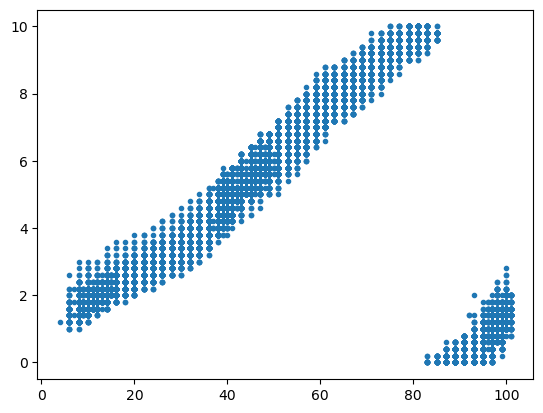

In [315]:
plt.plot(tmp['tdc'], y, '.')

In [30]:
## timewalk

nsteps = param.shape[0]
toa = np.empty([n, nsteps])
for i in range(nsteps):
    ev = dat0[dat0['event_number']==i]
    tmp = np.array([
            ev['col']==col,
            ev['row']==row])
    ev = ev[np.all(tmp, axis=0)]
    toa[:,i] = np.bincount(ev['toa'], minlength=minlength)[:minlength]

plt.imshow(toa, origin='lower', extent=(param['inj'][0], param['inj'][-1], 0, minlength*5), aspect='auto')
plt.xlabel('Injection [Vpp]')
plt.ylabel('ToA [ns]')
plt.title('Comparator1')

NameError: name 'col' is not defined

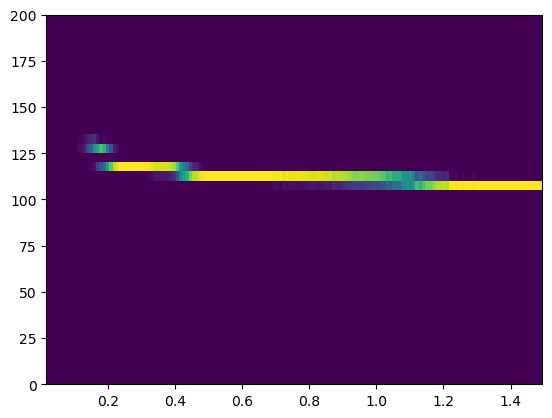

In [25]:
plt.imshow(toa, origin='lower', 
           extent=(inj[0], inj[-1], 0, minlength*5),
           aspect='auto')

In [92]:
with tb.open_file(fhit) as f:
    ev = f.root.event_data[:]

array([683, 855, 682, ...,  54,  54,  53], dtype=uint16)

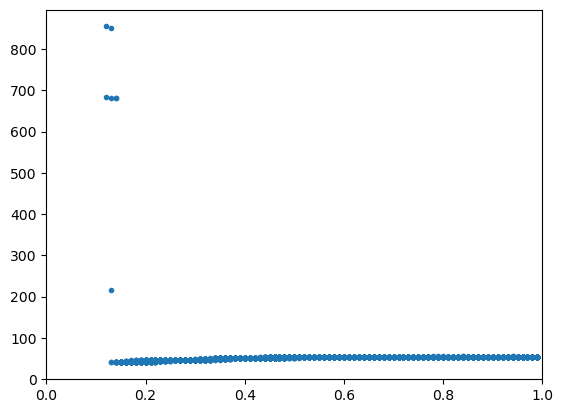

In [108]:
tmp = ev[(ev['col']==1) &(ev['comp']==1)]
plt.plot(param1[tmp['event_number']]['inj']*0.1, (tmp['tot']+tmp['toa'])>>1 &0x3FF, '.')
plt.xlim(0, 1)

(tmp['tot']+tmp['toa'])>>1&0x3FF

In [386]:
class test0():
    A = 1
    def __init__(self):
        pass
    def printvar(self):
        print(self.A)

class test(test0):
    A = 2
    B = 3

    def printvar(self):
        print(self.A, self.B)
    
    
a = test0()
b = test()
c = test()
b.printvar()
c.printvar()
print('-------------')
b.B=100

b.printvar()
c.printvar()


        

2 3
2 3
-------------
2 100
2 3


3